In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel as reader
import random
import utm
from geopy.distance import distance as geodis

In [19]:
xl_file = reader("cities.xlsx", engine='openpyxl')
cities = np.array(xl_file["Number"])
name = np.array(xl_file["City"])
lat = np.array(xl_file["lat"])
long = np.array(xl_file["long"])

citylat = np.array([[lat[i], long[i]] for i in range(len(lat))])
cityCoordinates = np.array([np.asarray(utm.from_latlon(lat[i], long[i])[0:2]) for i in range(len(lat))])

#penlty
xl = reader("Book1.xlsx", engine='openpyxl')
adj = np.asarray(xl)[:,1:]
#furirus penalty
#for i in range(len(adj)):
 #   for j in range(len(adj)):
  #      if adj[i,j] == 9:
   #         adj[i,j] = adj[i,j] * 100
            
#no penalty
#adj = np.ones((len(cities), len(cities)))

adjacency = np.zeros((len(cities),len(cities)))
for i in range(len(cities)):
    for j in range(len(cities)):
        if i < j:
            adjacency[i, j] = geodis((lat[i], long[i]), (lat[j], long[j])).km
        elif i == j:
            continue
        else:
            adjacency[i, j] = adjacency[j, i]

In [20]:
MUTATION_RATE = 40
MUTATION_REPEAT_COUNT = 2
WEAKNESS_THRESHOLD = 35500

In [21]:
citySize = len(cityCoordinates)

class Genome():
    chromosomes = []
    fitness = 0

In [ ]:
def CreateNewPopulation(size):
    population = []
    for x in range(size):
        newGenome = Genome()
        newGenome.chromosomes = random.sample(range(0, citySize), citySize)
        newGenome.fitness = Evaluate(newGenome.chromosomes)
        population.append(newGenome)
    return population

In [23]:
def Evaluate(chromosomes):
    calculatedFitness = 0
    for i in range(len(chromosomes) - 1):
        calculatedFitness += adjacency[chromosomes[i]][chromosomes[i + 1]] * adj[chromosomes[i]][chromosomes[i + 1]]
    calculatedFitness = np.round(calculatedFitness, 2)
    return calculatedFitness

In [24]:
def findBestGenome(population):
    allFitness = [i.fitness for i in population]
    bestFitness = min(allFitness)
    return population[allFitness.index(bestFitness)]

In [25]:
# In K-Way tournament selection, we select K individuals
# from the population at random and select the best out
# of these to become a parent. The same process is repeated
# for selecting the next parent.
def TournamentSelection(population, k):
    selected = [population[random.randrange(0, len(population))] for i in range(k)]
    bestGenome = findBestGenome(selected)
    return bestGenome

In [26]:
def Reproduction(population):
    parent1 = TournamentSelection(population, 10).chromosomes
    parent2 = TournamentSelection(population, 6).chromosomes
    while parent1 == parent2:
        parent2 = TournamentSelection(population, 6).chromosomes

    return OrderOneCrossover(parent1, parent2)

In [27]:
def OrderOneCrossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    #point = random.randrange(10, size - 15), range(point - 3, point + 12)
    point = 8
    
    for i in range(8, 20):
        child[i] = parent1[i]
    
    j = 0
    for i in range(size):
        while child[i] == -1:
            if parent2[j] in child:
                j += 1 
            else:
                child[i] = parent2[j]
                j +=1
    

    if random.randrange(0, 100) < MUTATION_RATE:
        child = SwapMutation(child)

    # Create new genome for child
    newGenome = Genome()
    newGenome.chromosomes = child
    newGenome.fitness = Evaluate(child)
    return newGenome

In [28]:
def SwapMutation(chromo):
    for x in range(MUTATION_REPEAT_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)]
        while p1 == p2:
            p2 = random.randrange(1, len(chromo) - 1)
        log = chromo[p1]
        chromo[p1] = chromo[p2]
        chromo[p2] = log
    return chromo

In [29]:
def GeneticAlgorithm(popSize, maxGeneration):
    allBestFitness = []
    bestchromosomes = []
    population = CreateNewPopulation(popSize)
    generation = 0
    while generation < maxGeneration:
        generation += 1

        for i in range(int(popSize / 2)):
            # Select parent, make crossover and
            # after, append in population a new child
            population.append(Reproduction(population))

        # Kill weakness person
        for genom in population:
            if genom.fitness > WEAKNESS_THRESHOLD:
                population.remove(genom)

        averageFitness = round(np.sum([genom.fitness for genom in population]) / len(population), 2)
        bestGenome = findBestGenome(population)
        print("\n" * 5)
        print("Generation: {0}\nPopulation Size: {1}\t Average Fitness: {2}\nBest Fitness: {3}"
              .format(generation, len(population), averageFitness,
                      bestGenome.fitness))

        allBestFitness.append(bestGenome.fitness)
        bestchromosomes.append(bestGenome.chromosomes)
    return  generation ,allBestFitness, bestchromosomes

In [ ]:
gen , allbest , bestgen = GeneticAlgorithm(150, 2000)







Generation: 1
Population Size: 112	 Average Fitness: 160717.19
Best Fitness: 115406.71






Generation: 2
Population Size: 93	 Average Fitness: 151948.71
Best Fitness: 114269.31






Generation: 3
Population Size: 84	 Average Fitness: 143955.24
Best Fitness: 99364.35






Generation: 4
Population Size: 79	 Average Fitness: 132176.25
Best Fitness: 103497.09






Generation: 5
Population Size: 77	 Average Fitness: 121761.21
Best Fitness: 86459.6






Generation: 6
Population Size: 76	 Average Fitness: 112225.41
Best Fitness: 79131.85






Generation: 7
Population Size: 75	 Average Fitness: 102577.26
Best Fitness: 79131.85






Generation: 8
Population Size: 75	 Average Fitness: 97879.89
Best Fitness: 77010.26






Generation: 9
Population Size: 75	 Average Fitness: 93494.17
Best Fitness: 76547.97






Generation: 10
Population Size: 75	 Average Fitness: 93191.91
Best Fitness: 76547.97






Generation: 11
Population Size: 75	 Average Fitness: 90781.44
Best Fitness: 76547.9

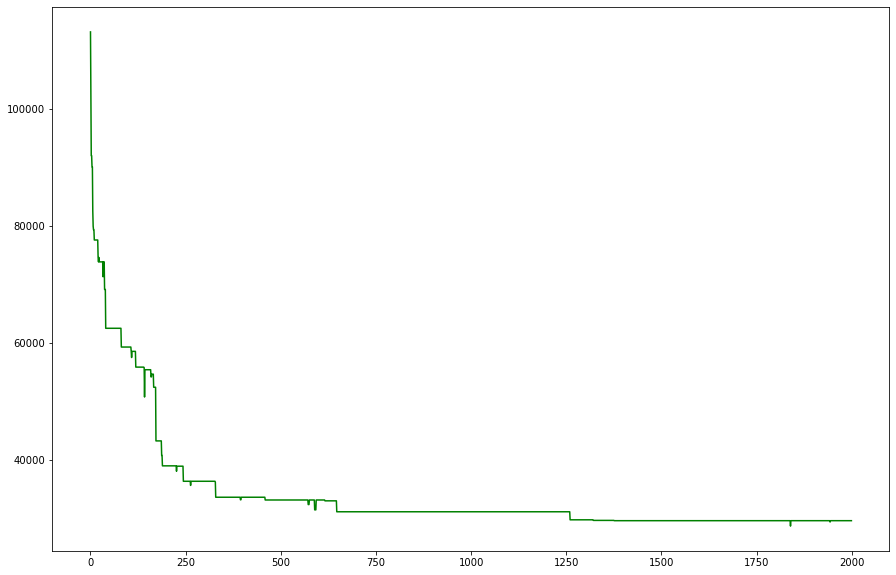

In [14]:
plt.rcParams['figure.figsize'] = [15,10];
plt.plot(range(0, gen), allbest, c="green")

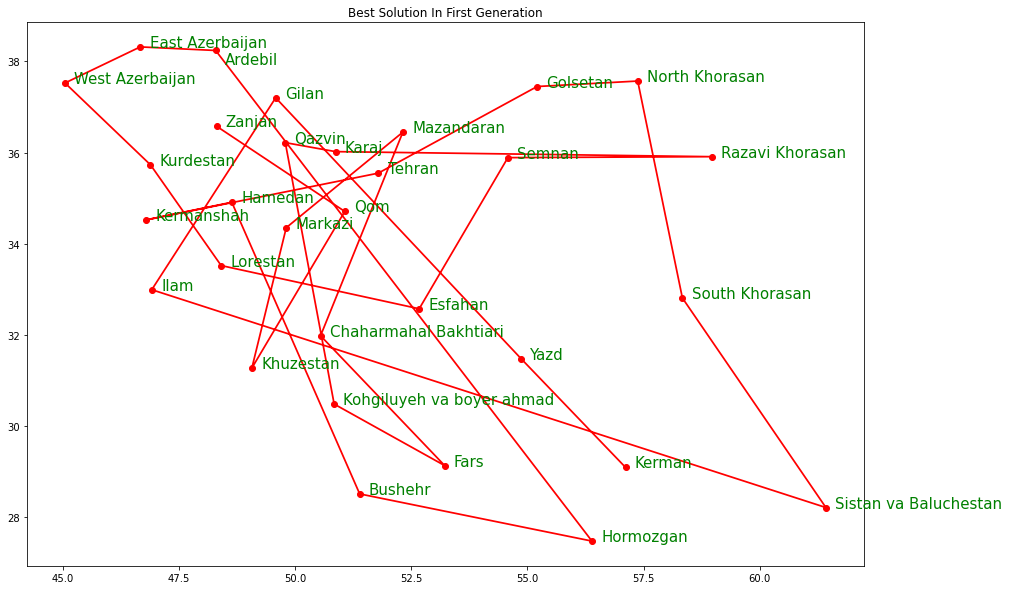

In [15]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[1]]
yy = [citylat[i][1] for i in bestgen[1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In First Generation")
plt.show()

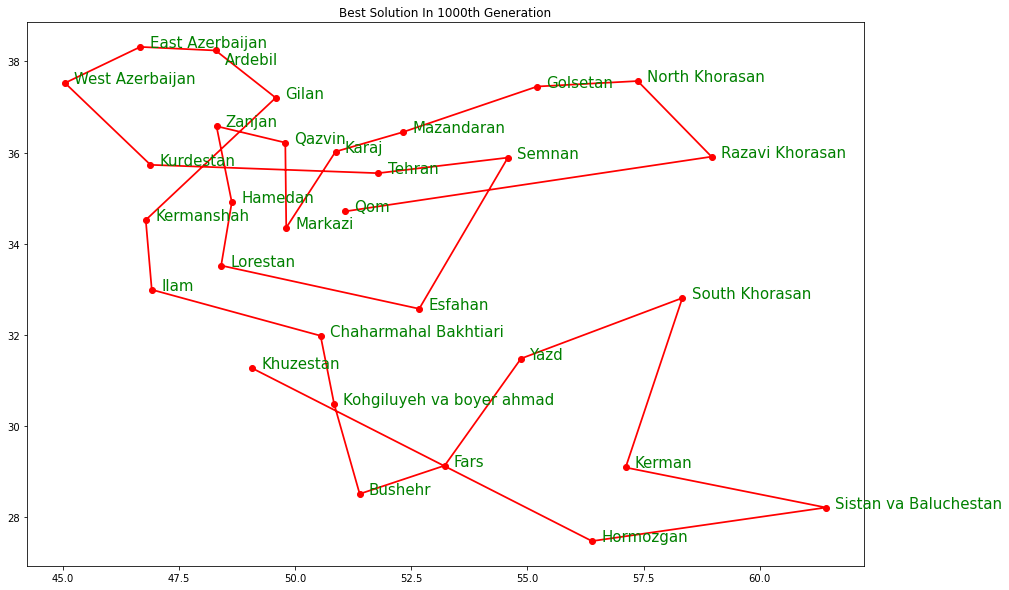

In [16]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[int(len(bestgen) / 2)]]
yy = [citylat[i][1] for i in bestgen[int(len(bestgen) / 2)]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 1000th Generation")
plt.show()

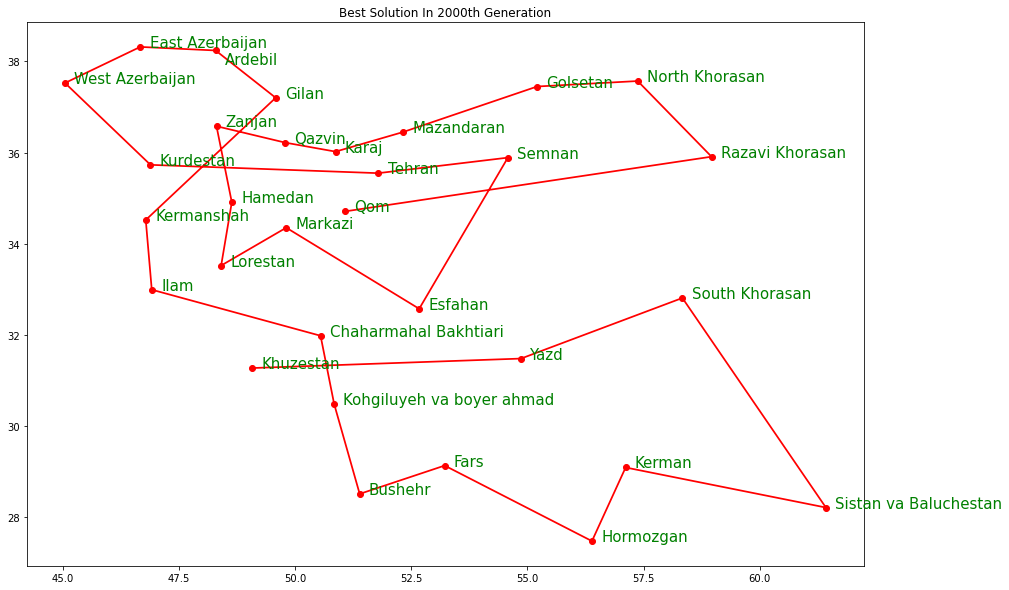

In [17]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[-1]]
yy = [citylat[i][1] for i in bestgen[-1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 2000th Generation")
plt.show()